In [21]:
import torch
from pathlib import Path
from models.yolo import Model

# Specify the path to your custom YOLO model weights file and YAML configuration file
custom_model_weights_path = Path('models') / 'yolov5s.pt'
custom_model_config_path = Path('models') / 'yolov5s.yaml'

# Load the custom YOLO model
custom_model = Model(cfg=str(custom_model_config_path))

# Load only the matching keys from the state dictionary
state_dict = torch.load(custom_model_weights_path, map_location=torch.device('cpu'))
filtered_state_dict = {k: v for k, v in state_dict.items() if k in custom_model.state_dict()}

# Update the model's state dictionary
custom_model.load_state_dict(filtered_state_dict, strict=False)
custom_model.eval()



                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  

In [32]:
from torchvision import transforms
# Preprocess the image
image_path = 'E:\\mosquito\\MSA_Aedes_japonicus_Cropped_22.jpg'
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([transforms.ToTensor()])
input_tensor = transform(image).unsqueeze(0)

# Pass the tensor to the model
results = custom_model(input_tensor)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 42 but got size 41 for tensor number 1 in the list.

In [33]:
# Pass the tensor to the model
with torch.no_grad():
    results = custom_model(input_tensor)

# Inspect the shapes of the output tensors
for i, tensor in enumerate(results):
    print(f"Tensor {i + 1} shape: {tensor.shape}")

# Perform necessary adjustments based on the output structure
# For example, if it's a list of tensors, concatenate them along dim=0
# results_combined = torch.cat(results, dim=0)



RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 42 but got size 41 for tensor number 1 in the list.

In [1]:
from ultralytics import YOLO

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



image 1/1 E:\mosquito\R (3).jpg: 480x640 1 ROI, 197.0ms
Speed: 11.0ms preprocess, 197.0ms inference, 12.0ms postprocess per image at shape (1, 3, 480, 640)


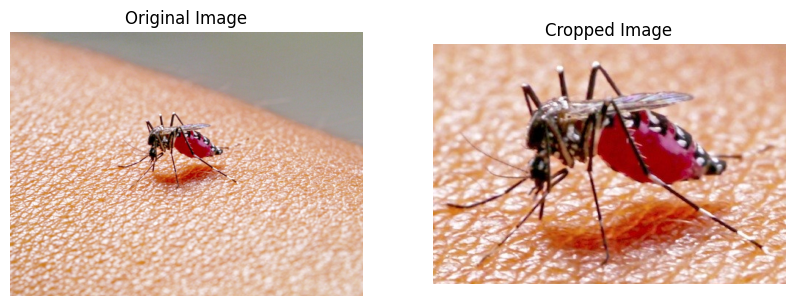

In [1]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create YOLO instance with your model
yolo = YOLO(model="E:\mosquito\models\yolov5s.pt")

# Run detection and get the list of results
results = yolo.predict(source="E:\mosquito\R (3).jpg", conf=0.25, save_crop=False)

# Access the first result in the list
first_result = results[0]

# Load the original image using Pillow
original_image_pil = Image.open("E:\mosquito\R (3).jpg")
original_image_np = np.array(original_image_pil)

# Access the bounding box coordinates
x_min, y_min, x_max, y_max = first_result.boxes[0].xyxy[0].tolist()

# Crop the image using NumPy slicing
cropped_image_np = original_image_np[int(y_min):int(y_max), int(x_min):int(x_max)]

# Display the original and cropped images using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original_image_np)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cropped_image_np)
ax[1].set_title('Cropped Image')
ax[1].axis('off')

plt.show()


In [5]:
import numpy as np
import tensorflow as tf
# Load the pre-trained model
model = tf.keras.models.load_model('models/MobileNET.h5')

# Define the labels for the categories
labels = {
    0 : 'Aedes_aegypti',
    1 : 'Aedes_albopictus',
    2 : 'Aedes_japonicus',
    3 : 'Aedes_koreicus',
    4 : 'Armigeres_Unknown',
    5 : 'Culex _pipiens',
    6 : 'Culex_quinquefasciatus',
    7 : 'Other _species'
 }

# Function to preprocess the image
def preprocess_image(image):
    # Resize the image to 224x224
    image = image.resize((224, 224))
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Normalize the image array
    # image_array = image_array / 255.0
    # Add an extra dimension to match the model's input shape
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Function to make predictions
def predict(image):
    # Preprocess the image
    processed_image = preprocess_image(image)
    # Make the prediction
    prediction = model.predict(processed_image)
    # Get the predicted label index
    label_index = np.argmax(prediction)
    # Get the predicted label
    predicted_label = labels[label_index]
    # Get the confidence level
    confidence = prediction[0][label_index] * 100
    return predicted_label, confidence

In [6]:
processed = preprocess_image(cropped_image_np)

ValueError: resize only works on single-segment arrays